# Exploratory-DataAnalysis On Top American Colleges

## Introduction

here we set the url link for downloading of CSV file. 

In [1]:
dataset_url = 'https://www.kaggle.com/datasets/kabhishm/top-american-colleges-2022'

here we install opendatasets

In [2]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


here we start the download of our CSV file from kaggle dataset

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\top-american-colleges-2022" (use force=True to force download)


In [4]:
data_dir = './top-american-colleges-2022'

In [5]:
import os

In [6]:
os.listdir('top-american-colleges-2022')

['top_colleges_2022.csv']

In [7]:
import pandas as pd

In [8]:
survey_raw_df = pd.read_csv('top-american-colleges-2022/top_colleges_2022.csv')

In [9]:
survey_raw_df

,description,rank,organizationName,state,studentPopulation,campusSetting,medianBaseSalary,longitude,latitude,website,...,yearFounded,stateCode,collegeType,carnegieClassification,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
0,"A leading global research university, MIT attr...",1,Massachusetts Institute of Technology,MA,12195,Urban,173700.0,-71.093539,42.359006,http://web.mit.edu,...,1861.0,MA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,3,12195,4582,35299332.0,75.0,60.0
1,Stanford University sits just outside of Palo ...,2,Stanford University,CA,20961,Suburban,173500.0,-122.168924,37.431370,http://www.stanford.edu,...,1891.0,CA,Private not-for-profit,Doctoral Universities: Very High Research Acti...,4,20961,8464,51328461.0,70.0,55.0
2,One of the top public universities in the coun...,2,"University of California, Berkeley",CA,45878,Urban,154500.0,-122.258393,37.869236,http://www.berkeley.edu,...,1868.0,CA,Public,Doctoral Universities: Very High Research Acti...,19,45878,33208,64495611.0,63.0,53.0
3,Princeton is a leading private research univer...,4,Princeton University,NJ,8532,Urban,167600.0,-74.659119,40.349855,http://www.princeton.edu,...,1746.0,NJ,Private not-for-profit,Doctoral Universities: Very High Research Acti...,4,8532,5516,44871096.0,62.0,61.0
4,"Located in upper Manhattan, Columbia Universit...",5,Columbia University,NY,33882,Urban,148800.0,-73.961288,40.806515,http://www.columbia.edu,...,1754.0,NY,Private not-for-profit,Doctoral Universities: Very High Research Acti...,6,33882,8689,44615007.0,58.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,St. Joseph’s College is a private institution ...,494,St. Joseph's College (NY),NY,5901,Urban,100900.0,-73.968304,40.690548,http://www.sjcny.edu,...,1916.0,NY,Private not-for-profit,Master's Colleges & Universities: Medium Programs,12,5901,4429,11919881.0,99.0,99.0
494,A liberal arts college founded by the Moravian...,495,Moravian University,PA,2961,Urban,109800.0,-75.381596,40.630303,http://www.moravian.edu,...,1742.0,PA,Private not-for-profit,Baccalaureate Colleges: Arts & Sciences Focus,11,2961,2268,12685943.0,100.0,100.0
495,Lawrence Technological University in Southfiel...,496,Lawrence Technological University,MI,3163,Urban,119900.0,-83.278458,42.450606,http://https://www.ltu.edu,...,NaN,MI,Private not-for-profit,Master's Colleges & Universities: Larger Programs,11,3163,2286,5639254.0,97.0,96.0
496,"Saint Martin’s University in Lacey, WA, one of...",497,Saint Martin's University,WA,1980,Urban,102100.0,NaN,NaN,NaN,...,NaN,WA,Private not-for-profit,Master's Colleges & Universities: Medium Programs,12,1980,1644,9759540.0,99.0,99.0


this data set contains, 498 different colleges with its 24 columns of its informations

In [10]:
survey_raw_df.columns

Index(['description', 'rank', 'organizationName', 'state', 'studentPopulation',
       'campusSetting', 'medianBaseSalary', 'longitude', 'latitude', 'website',
       'phoneNumber', 'city', 'country', 'state.1', 'region', 'yearFounded',
       'stateCode', 'collegeType', 'carnegieClassification',
       'studentFacultyRatio', 'totalStudentPop', 'undergradPop',
       'totalGrantAid', 'percentOfStudentsFinAid', 'percentOfStudentsGrant'],
      dtype='object')

In [11]:
schema_fname = 'top-american-colleges-2022/top_colleges_2022.csv'

schema_raw = pd.read_csv(schema_fname, index_col='Index')

## Data Preparation & Cleaning

here we will only extract columns which we will survey upon

In [12]:
selected_columns = [
    # colleges informations
    'organizationName',
    'rank',
    'collegeType',
    'medianBaseSalary',
    'longitude',
    'latitude',
    'state',
    'region',
    'yearFounded',
    # student informations
    'totalStudentPop',
    'undergradPop',
]

In [13]:
len(selected_columns)

11

therefore, we have taken 11 columns for survey

In [14]:
survey_df = survey_raw_df[selected_columns].copy()

In [15]:
schema = survey_df[selected_columns]

lets see some basic information about our dataset

In [16]:
survey_df.shape

(498, 11)

therefore our dataset has 489 rows and 11 columns

In [17]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   organizationName  498 non-null    object 
 1   rank              498 non-null    int64  
 2   collegeType       498 non-null    object 
 3   medianBaseSalary  491 non-null    float64
 4   longitude         458 non-null    float64
 5   latitude          458 non-null    float64
 6   state             498 non-null    object 
 7   region            489 non-null    object 
 8   yearFounded       451 non-null    float64
 9   totalStudentPop   498 non-null    int64  
 10  undergradPop      498 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 42.9+ KB


In [18]:
survey_df.describe()

,rank,medianBaseSalary,longitude,latitude,yearFounded,totalStudentPop,undergradPop
count,498.000000,491.000000,458.000000,458.000000,451.000000,498.000000,498.000000
mean,249.485944,116382.077393,-88.871596,39.082492,1879.944568,16073.983936,12075.550201
std,143.899350,17161.769465,18.490733,4.481500,50.805940,16284.865007,12628.161452
min,1.000000,77300.000000,-157.820047,21.299373,1636.000000,421.000000,421.000000
25%,125.250000,104300.000000,-96.924510,36.105500,1851.000000,3112.500000,2613.750000
50%,249.500000,112800.000000,-84.251869,40.195954,1878.000000,9850.000000,6844.500000
75%,373.750000,125000.000000,-75.471093,42.210113,1908.500000,24363.000000,18655.250000
max,498.000000,173700.000000,85.501600,48.752350,2013.000000,102826.000000,84202.000000


no need to re-arrange since all data are correctly provided,
from here we see, there are 498 colleges ranked from 1 to 498. 
latest founded college was at 2013 AD, while firstly founded college was at 1636 AD. 

In [19]:
survey_df

,organizationName,rank,collegeType,medianBaseSalary,longitude,latitude,state,region,yearFounded,totalStudentPop,undergradPop
0,Massachusetts Institute of Technology,1,Private not-for-profit,173700.0,-71.093539,42.359006,MA,Northeast,1861.0,12195,4582
1,Stanford University,2,Private not-for-profit,173500.0,-122.168924,37.431370,CA,West,1891.0,20961,8464
2,"University of California, Berkeley",2,Public,154500.0,-122.258393,37.869236,CA,West,1868.0,45878,33208
3,Princeton University,4,Private not-for-profit,167600.0,-74.659119,40.349855,NJ,Northeast,1746.0,8532,5516
4,Columbia University,5,Private not-for-profit,148800.0,-73.961288,40.806515,NY,Northeast,1754.0,33882,8689
...,...,...,...,...,...,...,...,...,...,...,...
493,St. Joseph's College (NY),494,Private not-for-profit,100900.0,-73.968304,40.690548,NY,Northeast,1916.0,5901,4429
494,Moravian University,495,Private not-for-profit,109800.0,-75.381596,40.630303,PA,Northeast,1742.0,2961,2268
495,Lawrence Technological University,496,Private not-for-profit,119900.0,-83.278458,42.450606,MI,Midwest,NaN,3163,2286
496,Saint Martin's University,497,Private not-for-profit,102100.0,NaN,NaN,WA,West,NaN,1980,1644


## Exploratory Analysis and Visualization

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (11, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### State
lets see how many colleges each state has

In [21]:
survey_df.state.nunique()

51

therefore there are 51 states

In [22]:
top_states = survey_df.state.value_counts()
top_states

NY    63
CA    55
PA    33
MA    27
TX    26
NJ    16
IL    16
MI    15
OH    15
VA    14
FL    14
WA    13
IN    12
MN    12
MD    12
NC    11
GA     9
OR     9
TN     9
CT     8
MO     8
WI     8
CO     7
SC     6
AL     5
RI     5
DC     5
IA     5
UT     4
LA     4
AZ     4
VT     4
ME     4
NH     4
KY     4
OK     3
ID     3
NE     3
NM     3
MS     2
MT     2
ND     2
SD     2
HI     2
AR     2
NV     2
KS     2
PR     1
WV     1
WY     1
DE     1
Name: state, dtype: int64

from the data , NY state has maximum number of colleges of 64, and DE,WY,WV,PR states has the minimum number of colleges of 1

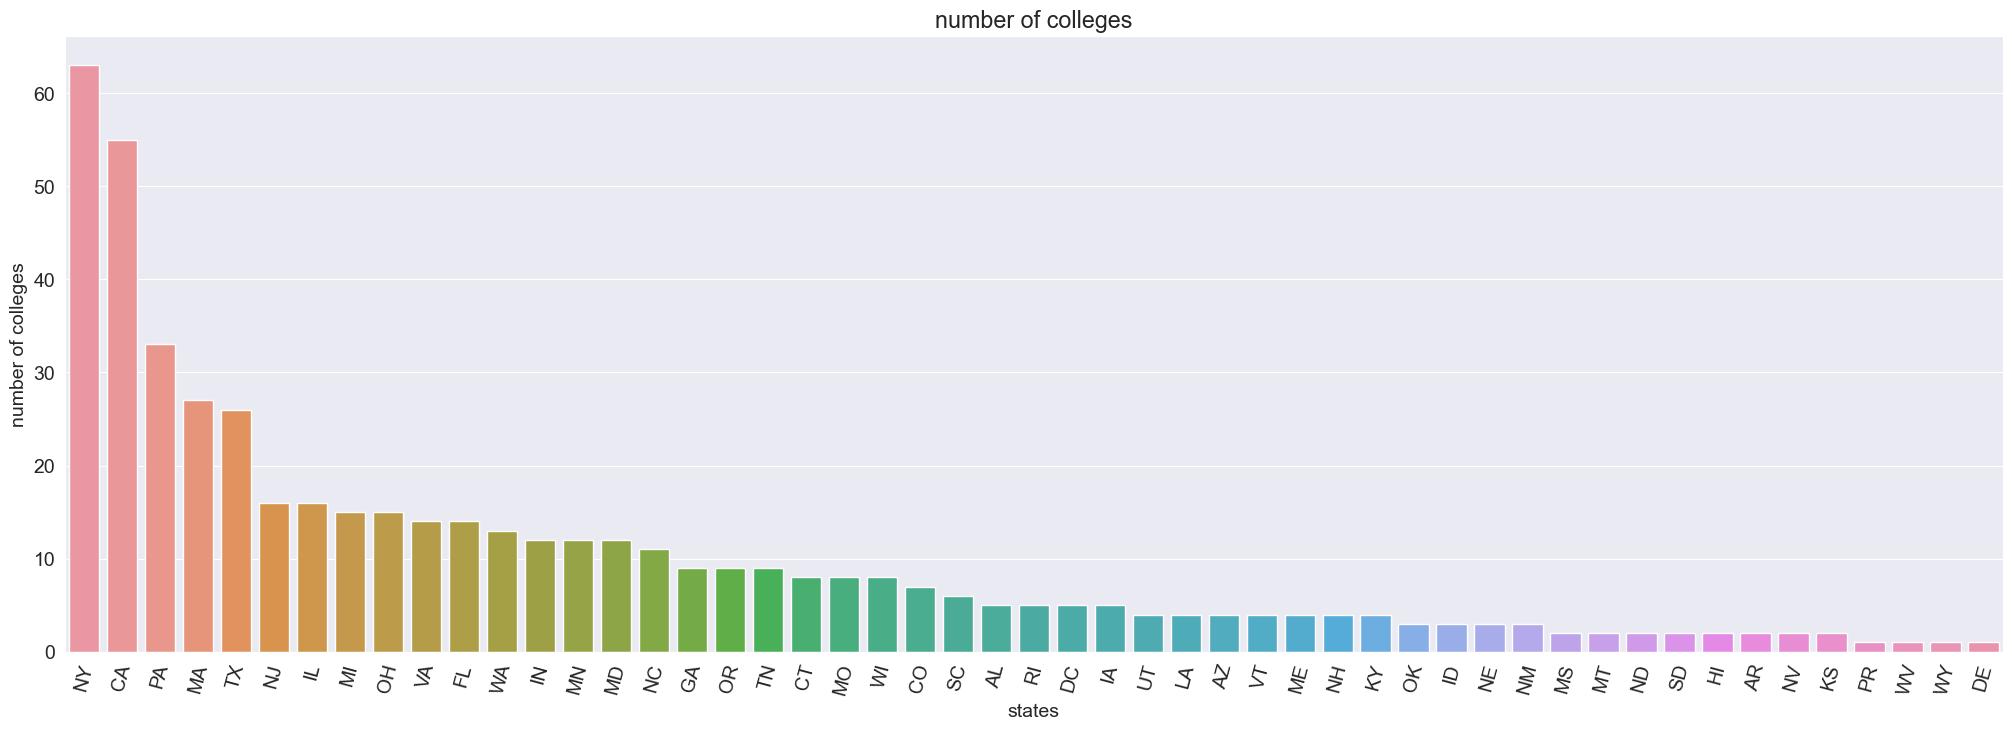

In [23]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=75)
plt.title('number of colleges')
ax = sns.barplot(x=top_states.index, y=top_states);
ax.set(xlabel='states', ylabel='number of colleges')
plt.show()

from the graph looks like NY state has the highest number of colleges, while DE states has the lowest number of colleges

### College Types (public and  Private)

lets see what percentage of public and private colleges are in united states of america

In [24]:
CollegeTypes_count = survey_df.collegeType.value_counts()
CollegeTypes_count

Private not-for-profit    270
Public                    228
Name: collegeType, dtype: int64

so, therefore there are 270 number of private colleges and 228 number of public colleges.

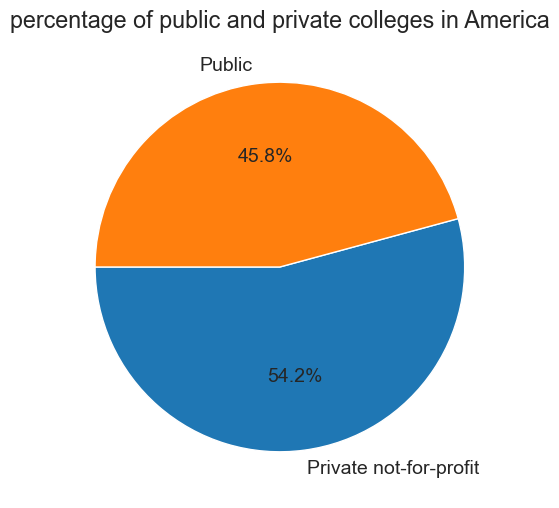

In [25]:
plt.figure(figsize=(12,6))
plt.title('percentage of public and private colleges in America')
plt.pie(CollegeTypes_count, labels=CollegeTypes_count.index, autopct='%1.1f%%', startangle=180);

from the pie chart it shows, there are 54.2% of private non-for-profit colleges in USA while there are 45.8% public colleges.

### location of colleges

lets see where colleges in USA are located

In [26]:
import numpy as np

In [27]:
arr = np.array(survey_df.longitude)
arr1 = np.array(survey_df.latitude)

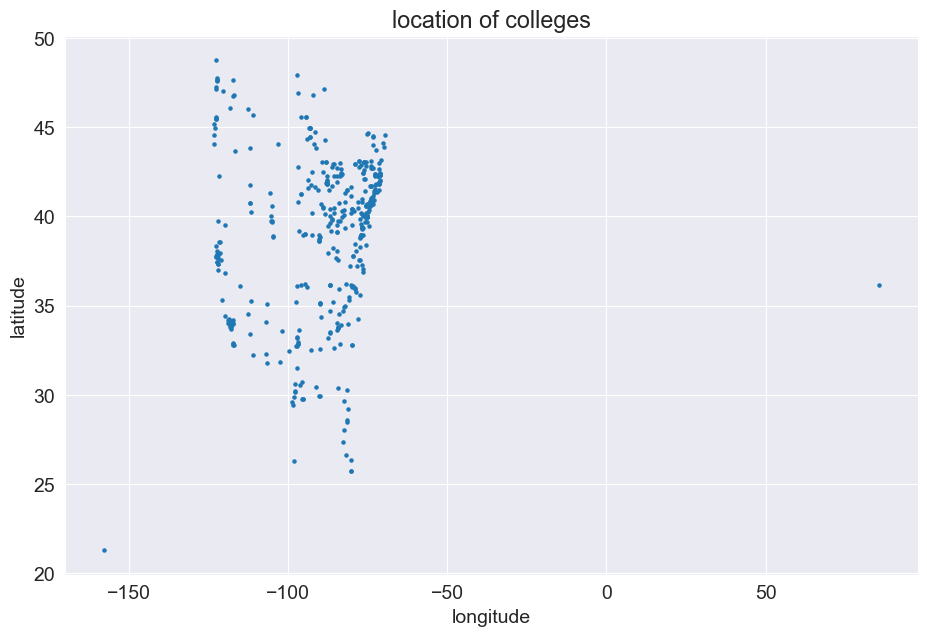

In [28]:
marker_size=5
plt.scatter(arr, arr1, marker_size)

# Adding details to the plot
plt.title('location of colleges')
plt.xlabel('longitude')
plt.ylabel('latitude')

# Displaying the plot
plt.show()

from above graph it looks like most colleges in USA are located  between (35 to 45) Latitute and between (-130 to -32) Longitute.

### Regions
lets see how many colleges each region has

In [29]:
survey_df.region.nunique()

4

therefore there are 4 different regions

In [30]:
top_regions = survey_df.region.value_counts()
top_regions

Northeast    181
West         105
South        104
Midwest       99
Name: region, dtype: int64

therefore, North east region has highest number of colleges, while Midwest region has lowest number of colleges

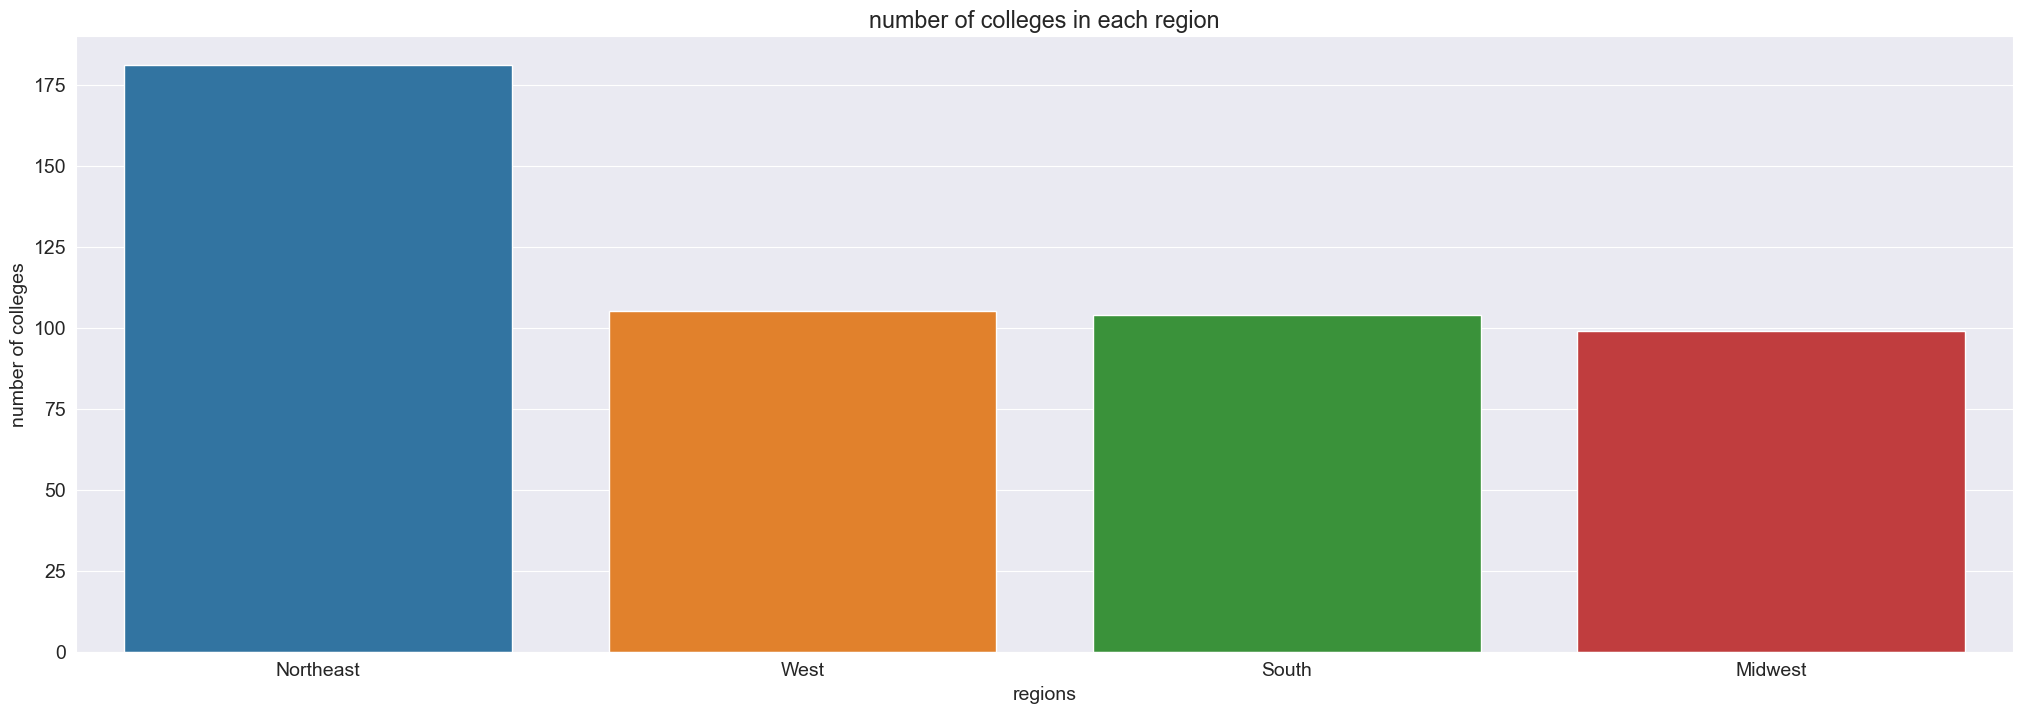

In [31]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=0)
plt.title('number of colleges in each region')
ax = sns.barplot(x=top_regions.index, y=top_regions);
ax.set(xlabel='regions', ylabel='number of colleges')
plt.show()

therefore, northeast has highest number of colleges, while midwest region has least number of colleges.
Also, west and south have almost identical number of colleges

## Asking and Answering Questions

### which college has  highest number of students?

here we convert the totaltudentpop dataset into a numpy array.
and use the numpy array max function to return highest number

In [32]:
arr = np.array(survey_df.totalStudentPop)
highest_studentpop = arr.max()

here we locate the highest number returned from a numpy array
and use it to find out highest number of students

In [33]:
survey_df.loc[(survey_df['totalStudentPop'] == highest_studentpop)]

,organizationName,rank,collegeType,medianBaseSalary,longitude,latitude,state,region,yearFounded,totalStudentPop,undergradPop
322,Pennsylvania State University,323,Public,NaN,-77.85878,40.807074,PA,Northeast,1855.0,102826,84202


therefore, Pennsylvania State University has the highest number of students of 102826 students.	

### which college has the lowest number of students?

here we convert the totaltudentpop dataset into a numpy array. and use the numpy array min function to return lowest number

In [34]:
arr = np.array(survey_df.totalStudentPop)
lowest_studentpop = arr.min()

here we locate the lowest number returned from a numpy array and use it to find out lowest number of students

In [35]:
survey_df.loc[(survey_df['totalStudentPop'] == lowest_studentpop)]

,organizationName,rank,collegeType,medianBaseSalary,longitude,latitude,state,region,yearFounded,totalStudentPop,undergradPop
126,Franklin W Olin College of Engineering,127,Private not-for-profit,NaN,NaN,NaN,MA,Northeast,NaN,421,421


therefore, Franklin W Olin College of Engineering has the lowest number of students of 421	 students.	

### which are the Top 10 ranked colleges?

we use pandas library function nsmallest() to sort out rank numbers

In [36]:
top_colleges = survey_df.nsmallest(10, 'rank')
top_colleges

,organizationName,rank,collegeType,medianBaseSalary,longitude,latitude,state,region,yearFounded,totalStudentPop,undergradPop
0,Massachusetts Institute of Technology,1,Private not-for-profit,173700.0,-71.093539,42.359006,MA,Northeast,1861.0,12195,4582
1,Stanford University,2,Private not-for-profit,173500.0,-122.168924,37.431370,CA,West,1891.0,20961,8464
2,"University of California, Berkeley",2,Public,154500.0,-122.258393,37.869236,CA,West,1868.0,45878,33208
3,Princeton University,4,Private not-for-profit,167600.0,-74.659119,40.349855,NJ,Northeast,1746.0,8532,5516
4,Columbia University,5,Private not-for-profit,148800.0,-73.961288,40.806515,NY,Northeast,1754.0,33882,8689
5,"University of California, Los Angeles",6,Public,137200.0,-118.437855,34.073903,CA,West,1919.0,46947,33641
6,Williams College,7,Private not-for-profit,152600.0,-73.208078,42.712389,MA,Northeast,1793.0,2307,2251
7,Yale University,8,Private not-for-profit,163700.0,-72.923425,41.314042,CT,Northeast,1701.0,14910,7199
8,Duke University,9,Private not-for-profit,155000.0,-78.940277,36.001389,NC,South,1924.0,17855,7278
9,University of Pennsylvania,10,Private not-for-profit,164000.0,-75.162369,39.952270,PA,Northeast,1740.0,30688,14202


therefore, Massachusetts Institute of Technology is the top ranked college. most of the top 10 ranked colleges are private colleges

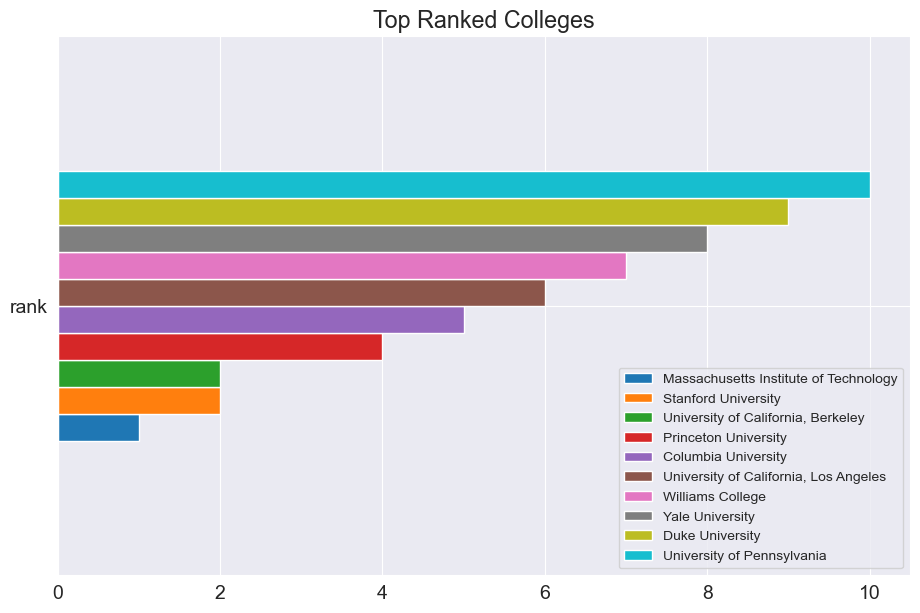

In [37]:
top_colleges[['rank']].T.plot.barh()
plt.legend(top_colleges.organizationName, prop={'size': 10})
plt.title('Top Ranked Colleges')
plt.show()

### which are the lowest 10 ranked colleges?

we use pandas library nlargest() function to sort out largest rank numbers.

In [38]:
LowestRankedColleges = survey_df.nlargest(10, 'rank')
LowestRankedColleges

,organizationName,rank,collegeType,medianBaseSalary,longitude,latitude,state,region,yearFounded,totalStudentPop,undergradPop
497,University of Memphis,498,Public,90700.0,-89.939618,35.118453,TN,South,1912.0,25128,20011
496,Saint Martin's University,497,Private not-for-profit,102100.0,NaN,NaN,WA,West,NaN,1980,1644
495,Lawrence Technological University,496,Private not-for-profit,119900.0,-83.278458,42.450606,MI,Midwest,NaN,3163,2286
494,Moravian University,495,Private not-for-profit,109800.0,-75.381596,40.630303,PA,Northeast,1742.0,2961,2268
493,St. Joseph's College (NY),494,Private not-for-profit,100900.0,-73.968304,40.690548,NY,Northeast,1916.0,5901,4429
492,The University of Texas of the Permian Basin,493,Public,97500.0,-102.375189,31.849150,TX,South,1973.0,8667,7278
491,Xavier University,492,Private not-for-profit,104900.0,-84.476379,39.149037,OH,Midwest,1831.0,8079,5473
490,Loyola University New Orleans,491,Private not-for-profit,102300.0,-90.077714,29.953690,LA,South,1904.0,4972,3538
489,College of Idaho,490,Private not-for-profit,113500.0,-116.675961,43.654855,ID,West,1884.0,1149,1116
488,Saint Francis University,489,Private not-for-profit,96300.0,NaN,NaN,PA,Northeast,NaN,3822,3076


therefore, University of Memphis is the lowest ranked college . most of the lower ranked colleges are private colleges.

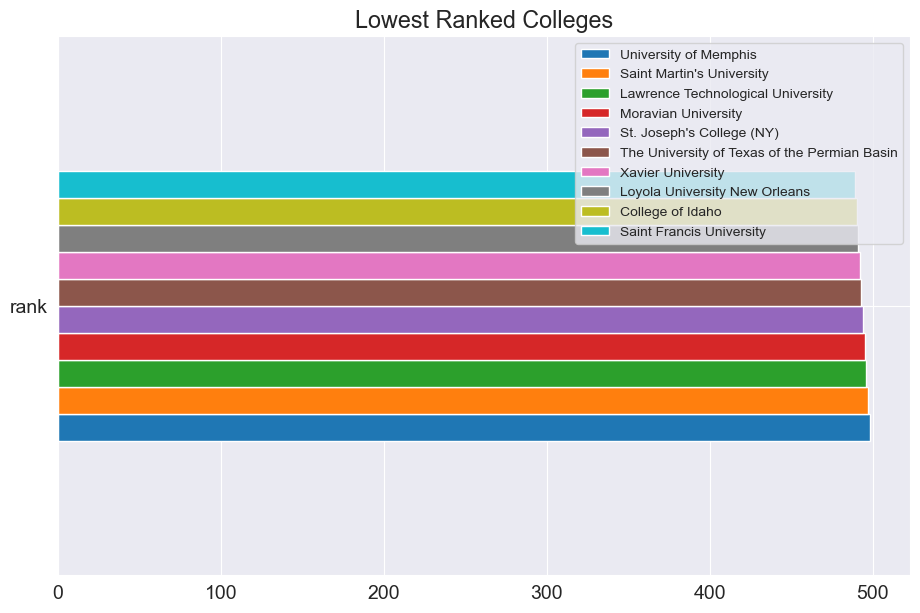

In [39]:
LowestRankedColleges[['rank']].T.plot.barh()
plt.legend(LowestRankedColleges.organizationName, prop={'size': 10})
plt.title('Lowest Ranked Colleges')
plt.show()

###  which are the Top 10 colleges with highest medianBaseSalary?

we use pandas library nlargest() function to sort out largest median base salary numbers

In [40]:
TopMedianSalary = survey_df.nlargest(10, 'medianBaseSalary')
TopMedianSalary 

,organizationName,rank,collegeType,medianBaseSalary,longitude,latitude,state,region,yearFounded,totalStudentPop,undergradPop
0,Massachusetts Institute of Technology,1,Private not-for-profit,173700.0,-71.093539,42.359006,MA,Northeast,1861.0,12195,4582
1,Stanford University,2,Private not-for-profit,173500.0,-122.168924,37.431370,CA,West,1891.0,20961,8464
14,Harvard University,15,Private not-for-profit,169000.0,-71.112957,42.374699,MA,Northeast,1636.0,41024,14431
113,Harvey Mudd College,114,Private not-for-profit,167800.0,-117.716404,34.096100,CA,West,1955.0,1132,1132
3,Princeton University,4,Private not-for-profit,167600.0,-74.659119,40.349855,NJ,Northeast,1746.0,8532,5516
44,California Institute of Technology,45,Private not-for-profit,164600.0,-118.125942,34.135911,CA,West,1891.0,2319,967
259,SUNY Maritime College,260,Public,164100.0,-73.801140,40.809180,NY,Northeast,1874.0,1860,1674
9,University of Pennsylvania,10,Private not-for-profit,164000.0,-75.162369,39.952270,PA,Northeast,1740.0,30688,14202
7,Yale University,8,Private not-for-profit,163700.0,-72.923425,41.314042,CT,Northeast,1701.0,14910,7199
46,Claremont McKenna College,47,Private not-for-profit,161700.0,-117.706769,34.102632,CA,West,1946.0,1361,1358


from above dataset, Massachusetts Institute of Technology is the rank 1 college with highest median base salary. and most of the colleges with high median base salary are private colleges.

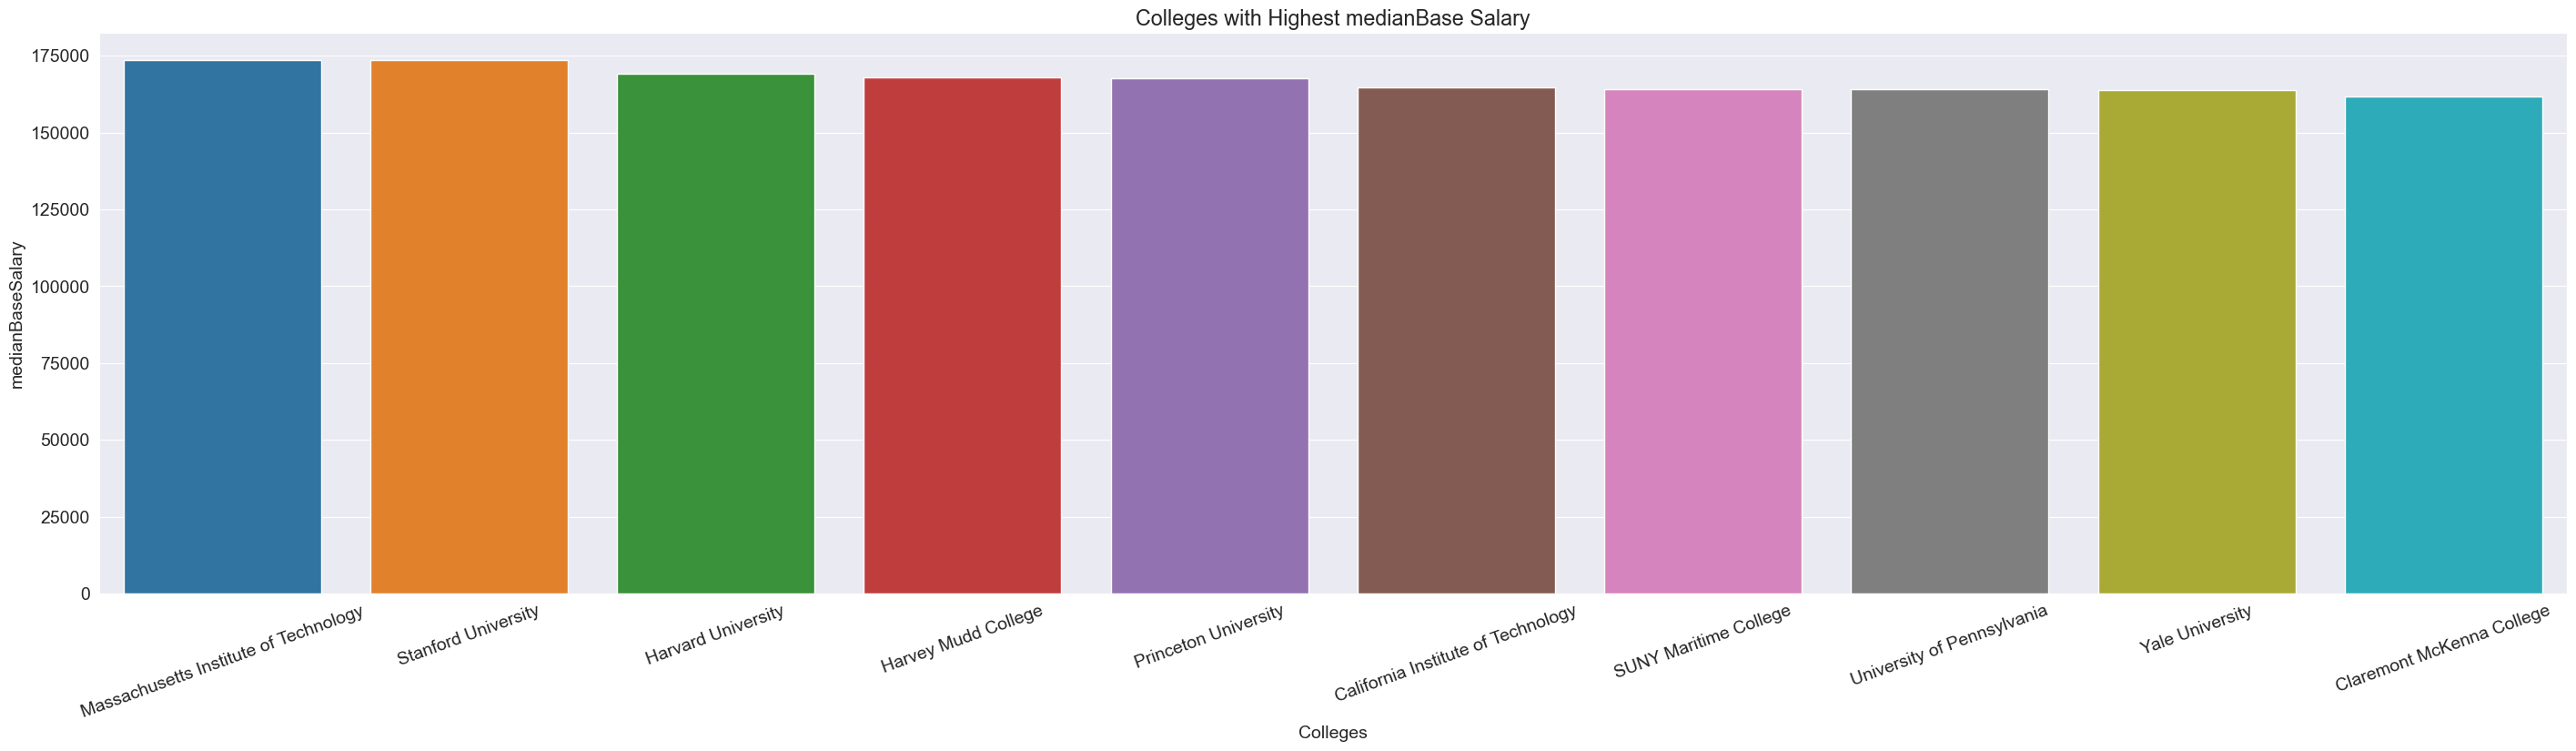

In [42]:
plt.figure(figsize=(35,8))
plt.xticks(rotation=20)
plt.title('Colleges with Highest medianBase Salary')
ax = sns.barplot(x=TopMedianSalary.organizationName, y=TopMedianSalary.medianBaseSalary);
ax.set(xlabel='Colleges', ylabel='medianBaseSalary')
plt.show()

# Inferences and Conclusion

this dataset helps us to find a lot about American Colleges in detail, from this dataset we can find which college is best and which is worst in all kinds of aspects either be in ranks or in Median Base salaries. We can find where most collages are located in a geographic range so it will be easier for choosing a college according to our own personal needs. there are plenty of insights on this dataset but that is it for now.

# References and Future Work

- combine this dataset with colleges of other parts of America to find more about Top ranking colleges all over American Continent.
- To learn more about data science and to Up skill myself.
- Implementing Machine learning to predict where the next Location of colleges will be according to Features of this Dataset.